In [1]:
library(forecast)
souvenir <- scan("http://robjhyndman.com/tsdldata/data/fancy.dat")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
souvenir

[1]   1664.81   2397.53   2840.71   3547.29   3752.96   3714.74   4349.61
 [8]   3566.34   5021.82   6423.48   7600.60  19756.21   2499.81   5198.24
[15]   7225.14   4806.03   5900.88   4951.34   6179.12   4752.15   5496.43
[22]   5835.10  12600.08  28541.72   4717.02   5702.63   9957.58   5304.78
[29]   6492.43   6630.80   7349.62   8176.62   8573.17   9690.50  15151.84
[36]  34061.01   5921.10   5814.58  12421.25   6369.77   7609.12   7224.75
[43]   8121.22   7979.25   8093.06   8476.70  17914.66  30114.41   4826.64
[50]   6470.23   9638.77   8821.17   8722.37  10209.48  11276.55  12552.22
[57]  11637.39  13606.89  21822.11  45060.69   7615.03   9849.69  14558.40
[64]  11587.33   9332.56  13082.09  16732.78  19888.61  23933.38  25391.35
[71]  36024.80  80721.71  10243.24  11266.88  21826.84  17357.33  15997.79
[78]  18601.53  26155.15  28586.52  30505.41  30821.33  46634.38 104660.67

In [3]:
ts_data<-ts(souvenir, start=c(1987,1), frequency = 12)
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1987,1664.81,2397.53,2840.71,3547.29,3752.96,3714.74,4349.61,3566.34,5021.82,6423.48,7600.60,19756.21
1988,2499.81,5198.24,7225.14,4806.03,5900.88,4951.34,6179.12,4752.15,5496.43,5835.10,12600.08,28541.72
1989,4717.02,5702.63,9957.58,5304.78,6492.43,6630.80,7349.62,8176.62,8573.17,9690.50,15151.84,34061.01
1990,5921.10,5814.58,12421.25,6369.77,7609.12,7224.75,8121.22,7979.25,8093.06,8476.70,17914.66,30114.41
1991,4826.64,6470.23,9638.77,8821.17,8722.37,10209.48,11276.55,12552.22,11637.39,13606.89,21822.11,45060.69
1992,7615.03,9849.69,14558.40,11587.33,9332.56,13082.09,16732.78,19888.61,23933.38,25391.35,36024.80,80721.71
1993,10243.24,11266.88,21826.84,17357.33,15997.79,18601.53,26155.15,28586.52,30505.41,30821.33,46634.38,104660.67


In [4]:
#split tran, test data
train<-window(ts_data, end=c(1992,5))
test<-window(ts_data, start=c(1992,6), end=c(1993,12))
train
test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1987,1664.81,2397.53,2840.71,3547.29,3752.96,3714.74,4349.61,3566.34,5021.82,6423.48,7600.60,19756.21
1988,2499.81,5198.24,7225.14,4806.03,5900.88,4951.34,6179.12,4752.15,5496.43,5835.10,12600.08,28541.72
1989,4717.02,5702.63,9957.58,5304.78,6492.43,6630.80,7349.62,8176.62,8573.17,9690.50,15151.84,34061.01
1990,5921.10,5814.58,12421.25,6369.77,7609.12,7224.75,8121.22,7979.25,8093.06,8476.70,17914.66,30114.41
1991,4826.64,6470.23,9638.77,8821.17,8722.37,10209.48,11276.55,12552.22,11637.39,13606.89,21822.11,45060.69
1992,7615.03,9849.69,14558.40,11587.33,9332.56,,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,,,,,,13082.09,16732.78,19888.61,23933.38,25391.35,36024.80,80721.71
1993,10243.24,11266.88,21826.84,17357.33,15997.79,18601.53,26155.15,28586.52,30505.41,30821.33,46634.38,104660.67


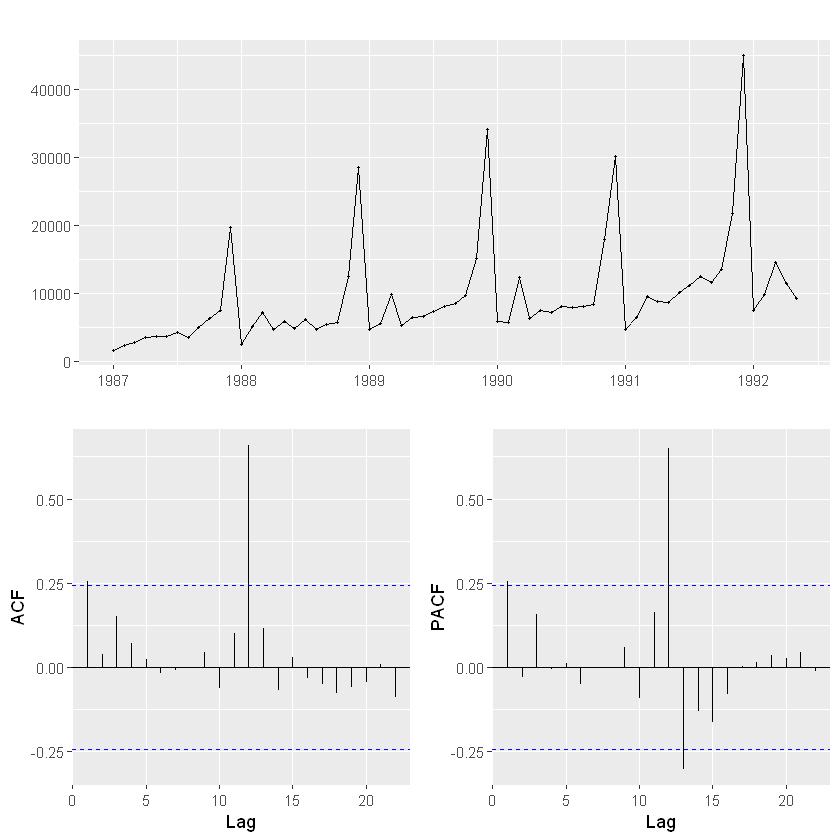

In [5]:
# check stationary of train
ggtsdisplay(train)

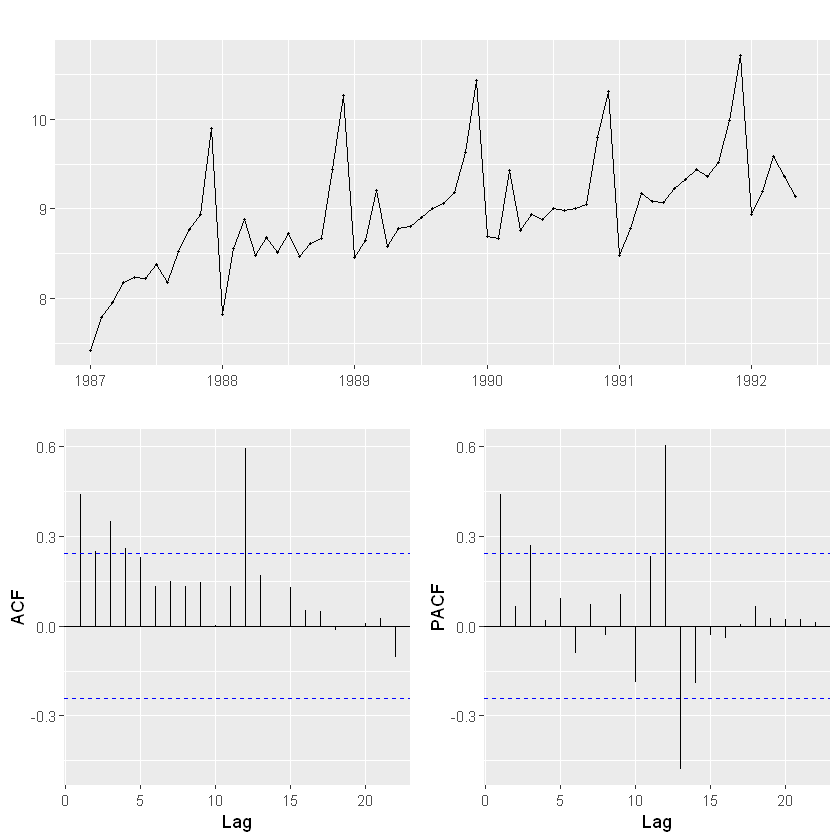

In [6]:
# 분산 안정화시켜서 해보기
ggtsdisplay(log(train))

In [7]:
# KPSS검정
library(urca)
# 원데이터 KPSS검정
summary(ur.kpss(train))

# 분산안정화한 데이터 KPSS검정
summary(ur.kpss(log(train)))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.7768 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.1677 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


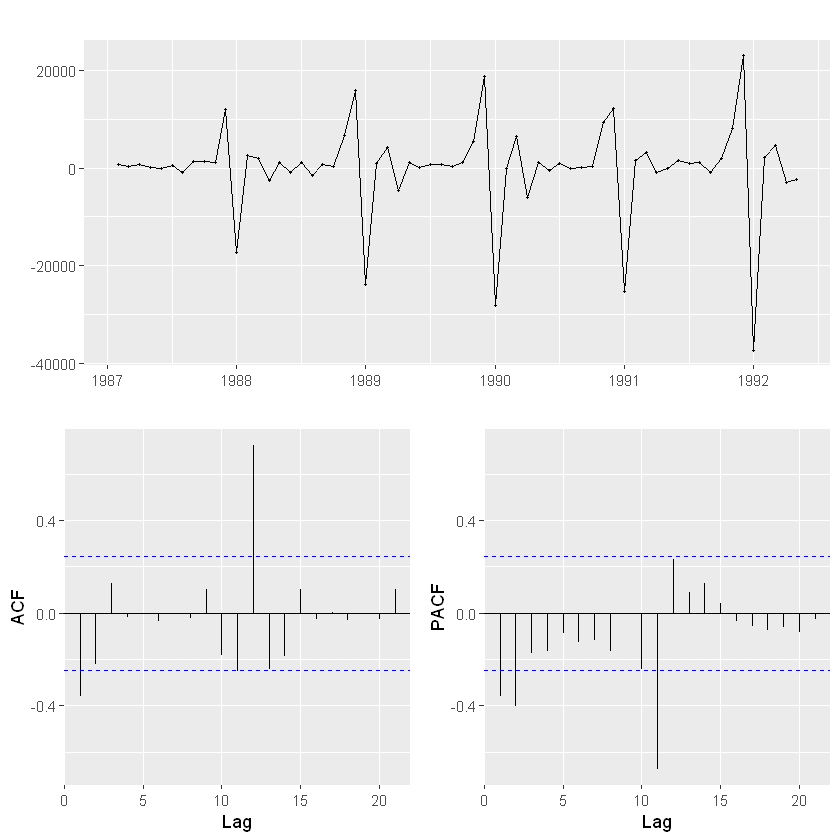

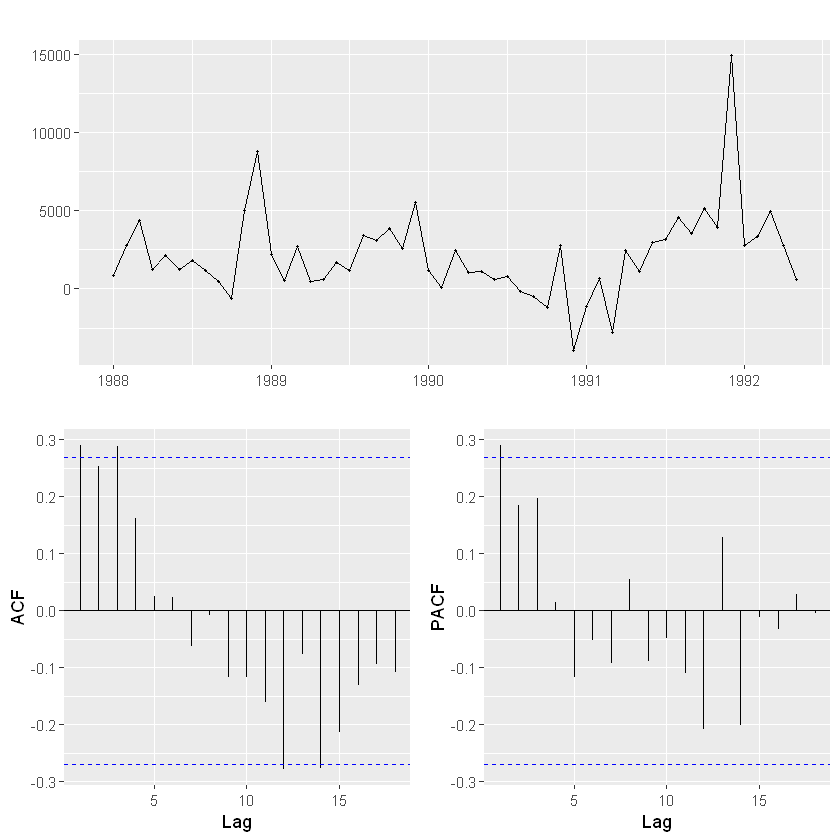

In [9]:
# 원 데이터 1번 차분해서 살펴보기
ggtsdisplay(diff(train))

# 원 데이터 계절적 1번 차분해서 살펴보기
ggtsdisplay(diff(train, lag=12))

In [10]:
# 추천해주는 차분횟수 살펴보기
ndiffs(train)
nsdiffs(train)

[1] 1

[1] 1

In [12]:
# KPSS 검정
summary(ur.kpss(sdiff_ts))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0563 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


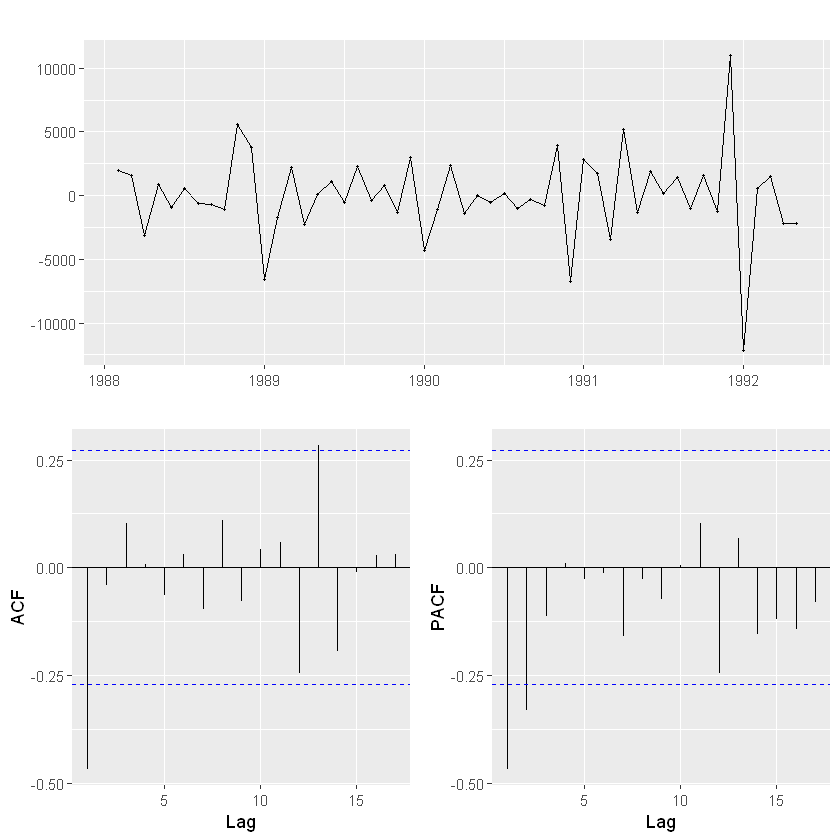

In [11]:
# 계절 차분 1회 + 일반 차분 1회 해서 살펴보기
diff_ts<-diff(train)
sdiff_ts<-diff(diff_ts, lag=12)
ggtsdisplay(sdiff_ts)

# ARIMA 모델 후보
   - ACF함수에서 주기 lag시점에서는 튄거 없고 그냥 일반적으로 팍 튄 막대가 하나 있기 때문에 MA(1)
   - PACF함수에서도 주기 lag시점에서는 튄거 없고 그냥 일반적으로 팍 튄 막대가 하나 또는 둘 AR(1) or AR(2)
   - 그러므로 SARMIA 모델에서 AR,MA는 모두 0으로!
    
   - <모델 후보> - 일반 차분1회, 계절 차분1회 해야함!
       * ARIMA(1,1,1) SARIMA(0,1,0)
       * ARIMA(2,1,1) SARIMA(0,1,0)


In [14]:
arima_1<-Arima(train, order=c(1,1,1), seasonal=c(0,1,0))
arima_2<-Arima(train, order=c(2,1,1), seasonal=c(0,1,0))
arima_3<-auto.arima(train)

# 적합된 모델을 파라미터와 AICc값 확인 # 둘다 차분한 모델이니 C(상수)값은 0! -> 정보손실값이 가장 낮음!!
arima_1
# (1 - (-0.0217)*B)(1-B)^1*yt-1 =  0 + (1 + (-0.6796)*B)εt
arima_2
# (1 - (-0.3085)*B - (-0.1925)*B^2)(1-B)^1*yt = 0 + (1 + (-0.3823)*B)εt
arima_3
# yt = 0.2570*yt-1 + εt + 160.3297

Series: train 
ARIMA(1,1,1)(0,1,0)[12] 

Coefficients:
          ar1      ma1
      -0.0217  -0.6796
s.e.   0.2500   0.2171

sigma^2 estimated as 7706185:  log likelihood=-485.39
AIC=976.77   AICc=977.27   BIC=982.63

Series: train 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
          ar1      ar2      ma1
      -0.3085  -0.1925  -0.3823
s.e.   0.4628   0.2865   0.4815

sigma^2 estimated as 7838848:  log likelihood=-485.27
AIC=978.53   AICc=979.39   BIC=986.34

Series: train 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1     drift
      0.2570  -0.4955  160.3297
s.e.  0.1326   0.1538   26.8398

sigma^2 estimated as 6042567:  log likelihood=-489.16
AIC=986.33   AICc=987.16   BIC=994.21


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(0,1,0)[12]
Q* = 7.6688, df = 11, p-value = 0.7426

Model df: 2.   Total lags used: 13



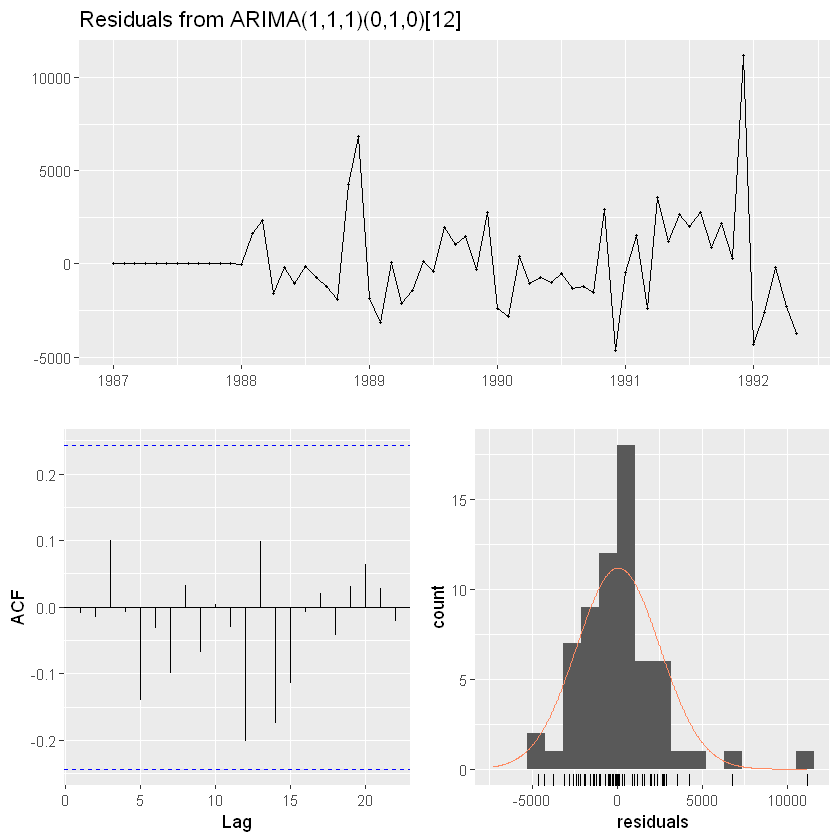


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)(0,1,0)[12]
Q* = 6.596, df = 10, p-value = 0.763

Model df: 3.   Total lags used: 13



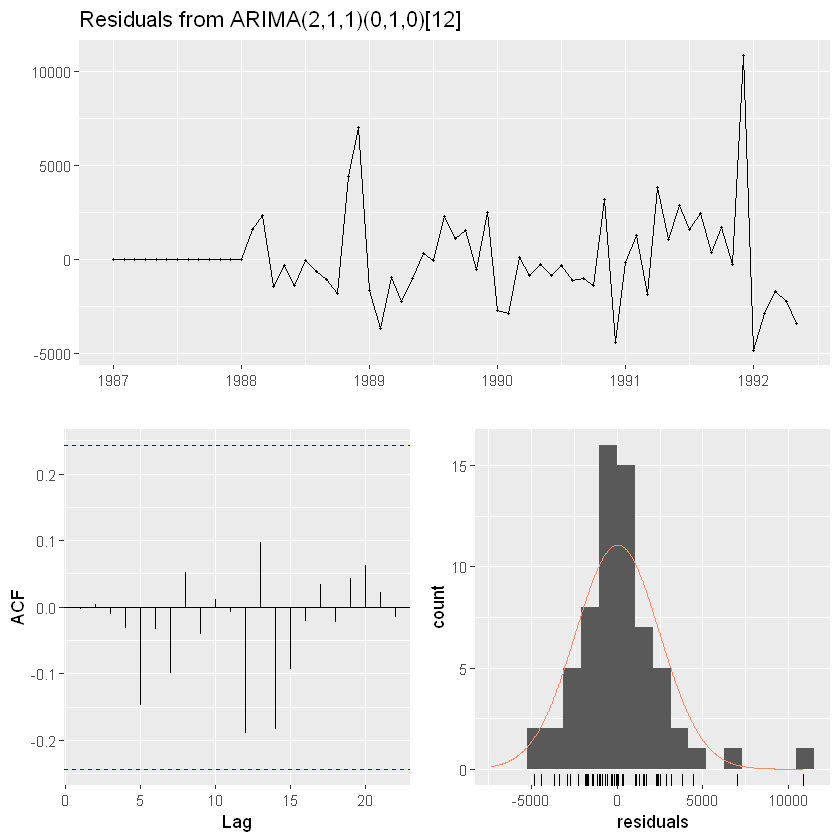


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(1,1,0)[12] with drift
Q* = 5.4909, df = 10, p-value = 0.8561

Model df: 3.   Total lags used: 13



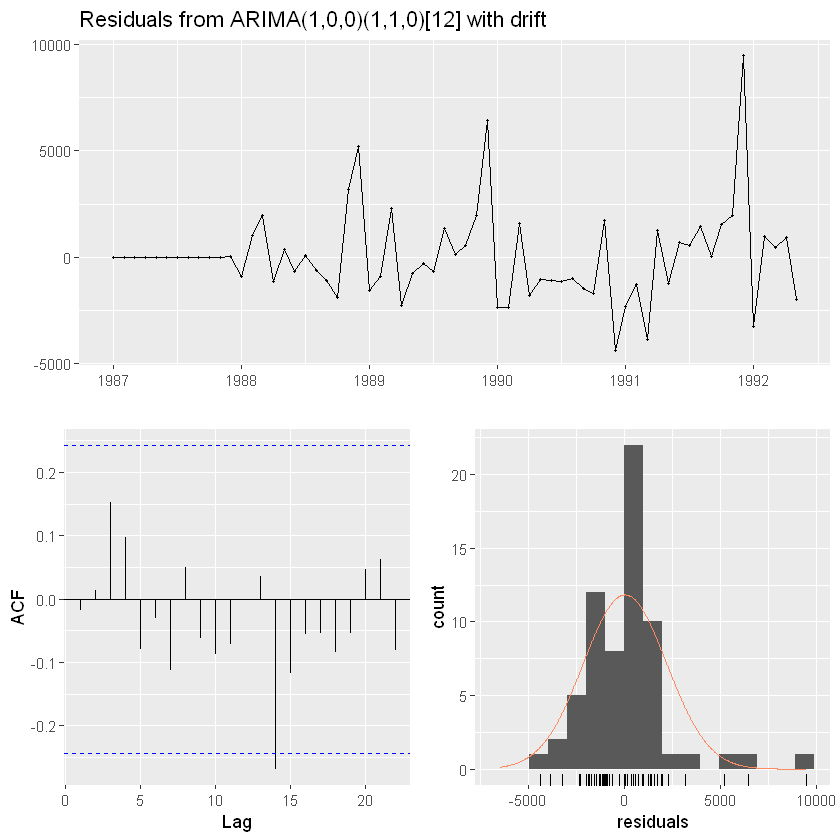

In [15]:
# 모델들 적합성 잔차를 통해서 비교해보기
checkresiduals(arima_1)
checkresiduals(arima_2)
checkresiduals(arima_3)

In [16]:
# RMSE값도 비교해보기
summary(arima_1)
summary(arima_2)
summary(arima_3)

Series: train 
ARIMA(1,1,1)(0,1,0)[12] 

Coefficients:
          ar1      ma1
      -0.0217  -0.6796
s.e.   0.2500   0.2171

sigma^2 estimated as 7706185:  log likelihood=-485.39
AIC=976.77   AICc=977.27   BIC=982.63

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 77.88623 2434.714 1586.768 -4.194653 16.39776 0.6225906
                     ACF1
Training set -0.009297075
Series: train 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
          ar1      ar2      ma1
      -0.3085  -0.1925  -0.3823
s.e.   0.4628   0.2865   0.4815

sigma^2 estimated as 7838848:  log likelihood=-485.27
AIC=978.53   AICc=979.39   BIC=986.34

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 39.36029 2430.902 1572.301 -4.290815 16.20089 0.6169143
                     ACF1
Training set -0.003036564
Series: train 
ARIMA(1,0,0)(1,1,0)[12] with drift 

Coefficients:
         ar1     sar1     drift
 

In [18]:
# test 데이터로 예측값과 비교해보기
for_arima1<-forecast(arima_1, h=19)
for_arima2<-forecast(arima_2, h=19)
for_arima3<-forecast(arima_3, h=19)

accuracy(for_arima1, test)
accuracy(for_arima2, test)
accuracy(for_arima3, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,77.88623,2434.714,1586.768,-4.194653,16.39776,0.6225906,-0.009297075,NA
Test set,10067.89810,16280.822,10338.521,24.030086,26.43784,4.0564639,0.206750224,0.8478243


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,39.36029,2430.902,1572.301,-4.290815,16.20089,0.6169143,-0.003036564,NA
Test set,10942.15089,16964.628,11063.705,27.627535,28.69252,4.3409999,0.217860303,0.9024598


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,32.90928,2155.952,1420.235,-5.537016,14.74204,0.5572492,-0.01734805,NA
Test set,12889.27812,19055.903,12889.278,34.810382,34.81038,5.0572891,0.18533214,1.044949


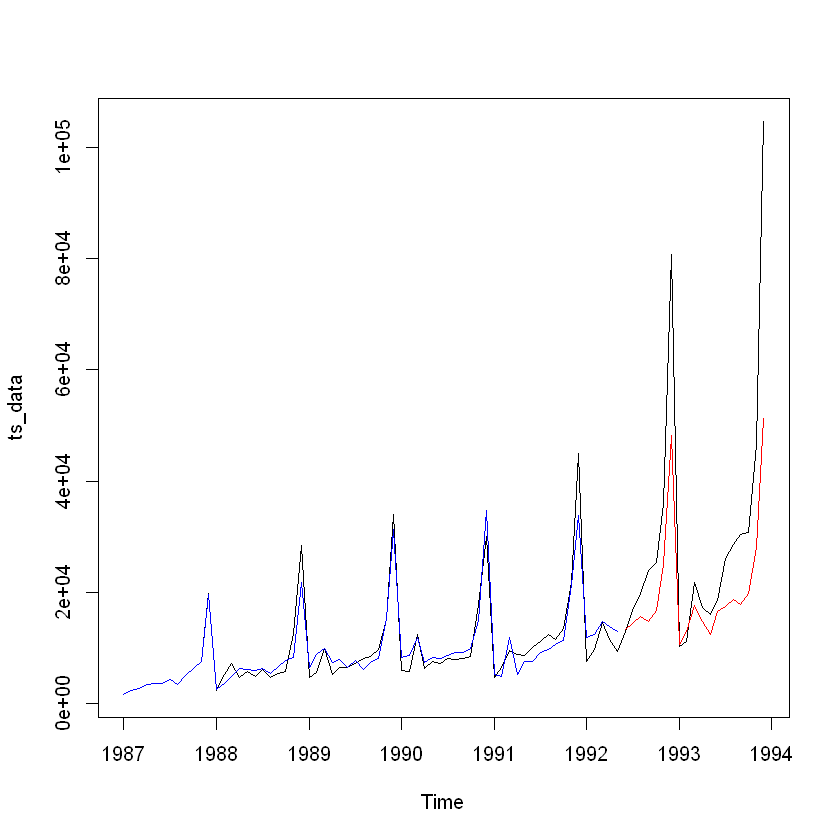

In [21]:
# arima1과 arima2 모델 두 개가 RMSE값들이 많이 비슷하지만 arima1모델이 정보손실량도 낮고  차수가 arima2보다 더적기 떄문에
# arima1 모델로 최종모델 선정

# 최종 선정한 모델로 원 데이터, 적합된 값, 예측값 그려보기
plot(ts_data)
lines(for_arima1$fitted, col='blue')
lines(for_arima1$mean, col='red')


# 그나마 제일 적합한 모델이지만 전체적으로 실제값과 예측값의 오차가 큰 편...